# Angular (radial) components & illusions: wedges, wheel-of-fortune/pin-wheel

Angular, or radial, stimuli are in some way defined by angles respective to the center.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import IPython
import ipywidgets as iw

from stimuli.utils import plot_stim, plot_stimuli


# angles

Each point in the image has an angle to the center point --
`components.angular.img_angles(...)` generates the matrix of these angles in an image
of given resolution (`visua_size`,`ppd`,`shape`).
The convention here is that of the unit-circle:
3 o'clock is $0$ and $360$ degrees ($0$ and $2\pi$ radians),
angle increases going counterclockwise.

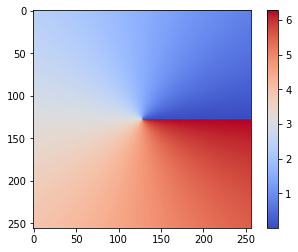

In [2]:
from stimuli.components.components import image_base

base = image_base(visual_size=(8,8),ppd=32, rotation=0)

plt.imshow(base["angular"], cmap="coolwarm")
plt.colorbar()
plt.show()

## angular_segments

`angular_segments` of an image can be defined by lower- and upper-limits
on the angles in the segment

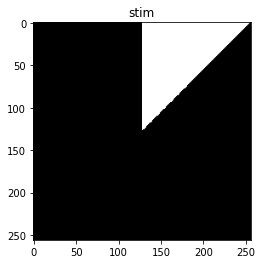

In [3]:
from stimuli.components.angular import angular_segments

stim = angular_segments(angles=[45, 90], intensities=[1], visual_size=(8,8), ppd=32)

plot_stim(stim)
plt.show()

As many segments, of any (non-negative) size, can be defined as desired --
and each segment is individually masked:

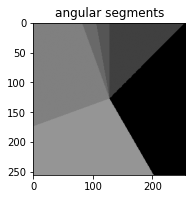

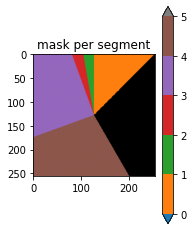

In [4]:
stim = angular_segments(angles=[45, 90, 100, 110, 200, 300], intensities=np.linspace(0.25,1,10), visual_size=(8,8), ppd=32)

plt.subplot(1,2,1)
plot_stim(stim, stim_name="angular segments")
plt.subplot(1,2,2)
plot_stim(stim, mask=True, stim_name="mask per segment")
plt.show()

## wedge
Angular segment, espcially their masks, can be used to cut out regions of other
types of stimuli.
For example: by masking everything but one angular segment of a circle,
one can create a `wedge(...)`:
this requires defining the angular-width of the wedge andoptionally a rotation 
(i.e., the lower limit on the angles in the wedge)
and of course the outer- (and optinally, inner-) radius of the circle:

In [5]:
from stimuli.components.angular import wedge

help(wedge)

# Define widgets
w_length = iw.IntSlider(value=5, min=1, max=10, description="heigh/width [deg]")
w_ppd = iw.IntSlider(value=40, min=1, max=64, description="ppd")

w_angle = iw.IntSlider(value=45, min=0, max=360, description="angle")
w_rotation = iw.IntSlider(value=45, min=0, max=360, description="rotate")
w_radii = iw.FloatRangeSlider(
    value=[1.0, 2.0], min=0.1, max=5.0, step=0.1, description="radii (inner,outer)"
)

w_idisc = iw.FloatSlider(value=1.0, min=0.0, max=1.0, description="intensity disc")
w_iback = iw.FloatSlider(value=0.5, min=0.0, max=1.0, description="intensity background")

b_size = iw.HBox([w_length, w_ppd])
b_intensities = iw.HBox([w_idisc, w_iback])
ui = iw.VBox([b_size, w_angle, w_rotation, w_radii, b_intensities])

# Function for showing stim
def show_wedge(
    width=None,
    rotation=None,
    length=None,
    ppd=None,
    radii=None,
    intensity_disc=None,
    intensity_background=None,
):

    stim = wedge(
        width=width,
        rotation=rotation,
        visual_size=(length, length),
        ppd=ppd,
        radius=radii[1],
        inner_radius=radii[0],
        intensity_background=intensity_background,
        intensity=intensity_disc,
    )
    plot_stim(stim)

# Set interactivity
out = iw.interactive_output(
    show_wedge,
    {
        "width": w_angle,
        "rotation": w_rotation,
        "length": w_length,
        "ppd": w_ppd,
        "radii": w_radii,
        "intensity_background": w_iback,
        "intensity_disc": w_idisc,
    },
)

# Show
display(ui, out)

Help on function wedge in module stimuli.components.angular:

wedge(width, radius, rotation=0.0, inner_radius=0.0, intensity=1.0, intensity_background=0.5, visual_size=None, ppd=None, shape=None)
    Draw a wedge, i.e., segment of a disc
    
    Parameters
    ----------
    width : float
        angular-width (in degrees) of segment
    radius : float
        radius of disc, in degrees visual angle
    rotation : float, optional
        angle of rotation (in degrees) of segment,
        counterclockwise from 3 o'clock, by default 0.0
    inner_radius : float, optional
        inner radius (in degrees visual angle), to turn disc into a ring, by default 0
    intensity : float, optional
        intensity value of wedge, by default 1.0
    intensity_background : float, optional
        intensity value of background, by default 0.5
    visual_size : Sequence[Number, Number], Number, or None (default)
        visual size [height, width] of image, in degrees
    ppd : Sequence[Number, Numb

Output()

## angular_grating
If the full 306 degrees is divided into a number of equal-width segments
this can also be considered an `angular.grating(...)`  (or radial grating).
The angular `segment_width` is also a measure of the angular `frequency`,
as is the `n_segments` -- any of these can be defined:

In [6]:
from stimuli.components.angular import grating

help(grating)

# Define widgets
w_length = iw.IntSlider(value=5, min=1, max=10, description="heigh/width [deg]")
w_ppd = iw.IntSlider(value=40, min=1, max=64, description="ppd")

w_rotation = iw.FloatSlider(value=45, min=0, max=360, description="rotate")
w_n_segments = iw.IntSlider(value=6, min=2, max=20, step=2, description="n segments")

b_size = iw.HBox([w_length, w_ppd])
ui = iw.VBox([b_size, w_rotation, w_n_segments])

# Function for showing stim
def show_grating(
    rotation=None,
    length=None,
    ppd=None,
    n_segments=None,
):

    stim = grating(
        rotation=rotation,
        visual_size=(length, length),
        ppd=ppd,
        n_segments=n_segments,
        intensities=[1, 0],
    )
    plot_stim(stim)


# Set interactivity
out = iw.interactive_output(
    show_grating,
    {
        "rotation": w_rotation,
        "length": w_length,
        "ppd": w_ppd,
        "n_segments": w_n_segments,
    },
)

# Show
display(ui, out)




Help on function grating in module stimuli.components.angular:

grating(shape=None, visual_size=None, ppd=None, frequency=None, n_segments=None, segment_width=None, rotation=0.0, intensities=[1.0, 0.0])
    Draw an angular grating, i.e., set of segments
    
    Parameters
    ----------
    shape : Sequence[Number, Number], Number, or None (default)
        shape [height, width] of image, in pixels
    visual_size : Sequence[Number, Number], Number, or None (default)
        visual size [height, width] of image, in degrees
    ppd : Sequence[Number, Number], Number, or None (default)
        pixels per degree [vertical, horizontal]
    frequency : Number, or None (default)
        angular frequency of angular grating, in cycles per angular degree
    n_segments : int, or None (default)
        number of segments
    segment_width : Number, or None (default)
        angular width of a single segment, in degrees
    rotation : float, optional
        angle of rotation (in degrees) grati

Output()

## pinwheel
Combining this with a circular `disc` component
now divides a circle into a set of equal-size wedges,
forming a `pinwheel`

In [7]:
from stimuli.components.angular import pinwheel

# Define widgets
w_length = iw.IntSlider(value=5, min=1, max=10, description="heigh/width [deg]")
w_ppd = iw.IntSlider(value=40, min=1, max=64, description="ppd")

w_rotation = iw.FloatSlider(value=45, min=0, max=360, description="rotate")
w_n_segments = iw.IntSlider(value=6, min=2, max=20, step=2, description="n segments")
w_radii = iw.FloatRangeSlider(
    value=[0.0, 2.0], min=0.0, max=5.0, step=0.1, description="radii (inner,outer)"
)
w_intensities = iw.FloatRangeSlider(
    value=[0.0, 1.0], min=0.0, max=1.0, step=0.1, description="intensities"
)

b_size = iw.HBox([w_length, w_ppd])
ui = iw.VBox([b_size, w_rotation, w_n_segments, w_radii, w_intensities])

# Function for showing stim
def show_pinwheel(
    rotation=None,
    length=None,
    ppd=None,
    n_segments=None,
    radii=None,
    intensities=None,
):

    stim = pinwheel(
        rotation=rotation,
        visual_size=(length, length),
        ppd=ppd,
        radius=radii[1],
        inner_radius=radii[0],
        n_segments=n_segments,
        intensities=intensities,
    )
    plot_stim(stim)


# Set interactivity
out = iw.interactive_output(
    show_pinwheel,
    {
        "rotation": w_rotation,
        "length": w_length,
        "ppd": w_ppd,
        "n_segments": w_n_segments,
        "radii": w_radii,
        "intensities": w_intensities,
    },
)

# Show
display(ui, out)

Output()

## illusions.angular.radial_white
Target(s) can be embedded in such a pinwheel,
to create a `radial_white`'s-like illusion

In [8]:
from stimuli.illusions.angular import radial_white

help(radial_white)

# Define widgets
# Resolution
w_length = iw.IntSlider(value=8, min=1, max=10, description="heigh/width [deg]")
w_ppd = iw.IntSlider(value=40, min=1, max=64, description="ppd")

# Pinwheel
w_rotation = iw.FloatSlider(value=45, min=0, max=360, description="rotate")
w_n_segments = iw.IntSlider(value=6, min=2, max=20, step=2, description="n segments")
w_radii = iw.FloatRangeSlider(
    value=[0.0, 2.0], min=0.0, max=5.0, step=0.1, description="radii (inner,outer)"
)
w_intensities = iw.FloatRangeSlider(
    value=[0.0, 1.0], min=0.0, max=1.0, step=0.1, description="intensities"
)

# Target
w_twidth = iw.FloatSlider(value=2, min=0, max=4, description="width target [deg]")
w_tcenter = iw.FloatSlider(value=2.5, min=0, max=4, description="center target [deg]")
w_tidx = iw.IntSlider(value=2, min=1, max=20, description="idx target")
w_itarget = iw.FloatSlider(value=0.5, min=0., max=1.0, description="intensity target")

b_size = iw.HBox([w_length, w_ppd])
b_seg = iw.HBox([w_n_segments, w_radii, w_rotation, w_intensities])
b_target = iw.HBox([w_tidx, w_twidth, w_tcenter, w_itarget])
ui = iw.VBox([b_size, b_seg, b_target, w_intensities])

def show_radial(
    length=None,
    ppd=None,
    n_segments=None,
    rotation=None,
    target_indices=None,
    target_width=None,
    target_center=None,
    intensities_segments=None,
    intensity_background=None,
    intensity_target=None,
):

    stim = radial_white(
        visual_size=length,
        ppd=ppd,
        n_segments=n_segments,
        rotation=rotation,
        target_indices=target_indices,
        target_width=target_width,
        target_center=target_center,
        intensity_background=intensity_background,
        intensities_segments=intensities_segments,
        intensity_target=intensity_target,
    )
    plot_stim(stim)


out = iw.interactive_output(show_radial,
                            {
                                "length": w_length,
                                "ppd": w_ppd,
                                "n_segments": w_n_segments,
                                "rotation": w_rotation,
                                "target_indices": w_tidx,
                                "target_width": w_twidth,
                                "target_center": w_tcenter,
                                "intensity_background": w_iback,
                                "intensities_segments": w_intensities,
                                "intensity_target": w_itarget,
                            })

display(ui, out)

Help on function radial_white in module stimuli.illusions.angular:

radial_white(visual_size=None, ppd=None, frequency=None, n_segments=None, segment_width=None, rotation=0.0, target_indices=[2, 5], target_width=1.0, target_center=1.0, intensities_segments=[1.0, 0.0], intensity_background=0.3, intensity_target=0.5, shape=None)
    Radial White stimulus
    
    Parameters
    ----------
    visual_size : (float, float)
        The shape of the stimulus in degrees of visual angle. (y,x)
    ppd : int
        pixels per degree (visual angle)
    frequency : Number, or None (default)
        angular frequency of angular grating, in cycles per angular degree
    n_segments : int, or None (default)
        number of segments
    segment_width : Number, or None (default)
        angular width of a single segment, in degrees
    rotation : float, optional
        rotation (in degrees) of pinwheel segments away
        counterclockwise from 3 o'clock, by default 0.0
    target_indices : int, o

Output()

It is possible to place as many targets as desired
by providing a list of `target_indices`.
The indices refer to the segments starting with `1` at the 3 o'clock position
(affected by `rotation`) and then going counter-clockwise.
Different targets can also have differnt `_width`, `_center` and `intensity_`

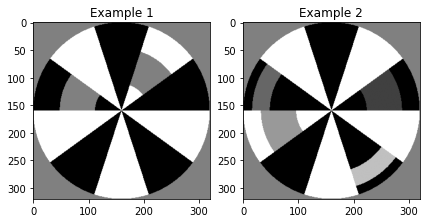

In [9]:
params = {
    "visual_size": (10., 10.),
    "ppd": 32.0,
    "n_segments": 10,
    "rotation": 0,
    "intensities_segments": (0., 1.),
    "intensity_background": 0.5,
}

stim1 = radial_white(**params, target_indices=(2, 5), target_width=2.0, target_center=2.5, intensity_target=0.5)
stim2 = radial_white(**params, target_indices=(1, 5, 6, 9), target_width=[2.0, 1.0], target_center=[3.0, 4.0], intensity_target=[0.25, 0.4, 0.6, 0.75])

plot_stimuli({"Example 1": stim1, "Example 2": stim2})
plt.show()